In [502]:
import astropy
import numpy as np
import matplotlib
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [27]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research data/MW_foreground_askap_parkes_PBC_K.fits')
file.info()
file[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research data/MW_foreground_askap_parkes_PBC_K.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   13495   (3901, 3471, 84)   float32   


SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                 3901  /                                               
NAXIS2  =                 3471  /                                               
NAXIS3  =                   84  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BLANK   =                   -1  /                                               
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2019-12-22T06:12:09.7'  /                                            
TELESCOP= 'ASKAP   '  /     

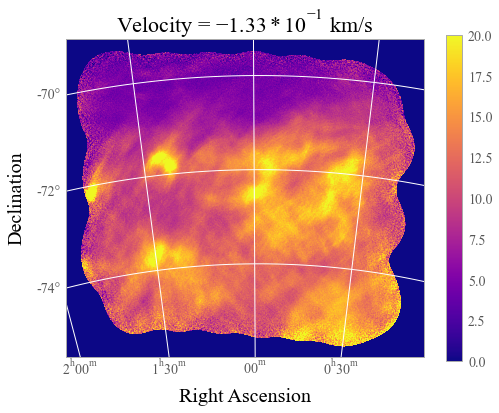

In [704]:
#VELOCITY = -1.33 * 10^2 M/S

def get_plot(v_val, v, image):
    #assigning world coordinate system (for the grid lines)
    wcs = WCS(file[0].header)
    # creating the plot - projection = wcs gives the grid lines and 'slices' is turning the 3d cube into a 2d object 
    ax = plt.subplot(projection = wcs, slices=('x', 'y', v_val))
    im = ax.imshow(file[0].data[v_val,:,:], cmap = 'plasma', vmin = 0, vmax = 20)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    ax.set_title('Velocity = ' + v + ' km/s', fontname = 'Times New Roman', fontsize = 22)
    plt.colorbar(im)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.color'] = 'Black'
    plt.rcParams['font.size'] = '14'
    plt.savefig(image)

get_plot(41, '$\mathregular{-1.33 * 10^{-1}}$', 'im_-1.33.png')

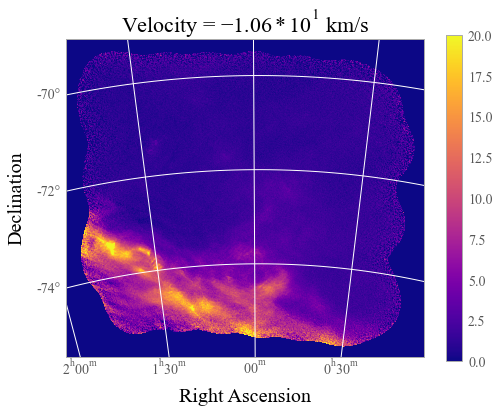

In [705]:
#VELOCITY = 1.06 * 10^4 M/S

get_plot(30, '$\mathregular{-1.06 * 10^1}$', 'im_-1.06.png')

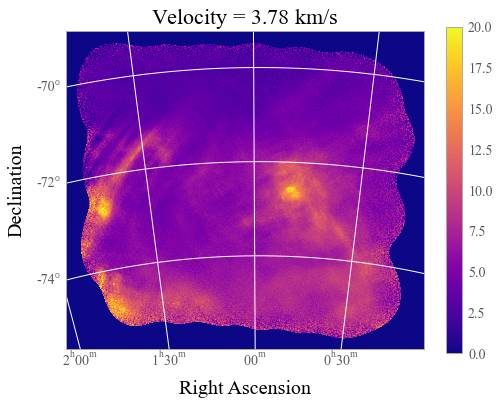

In [706]:
#VELOCITY = 3.78 * 10^3 M/S

get_plot(37, '$\mathregular{3.78} $', 'im_3.78.png')

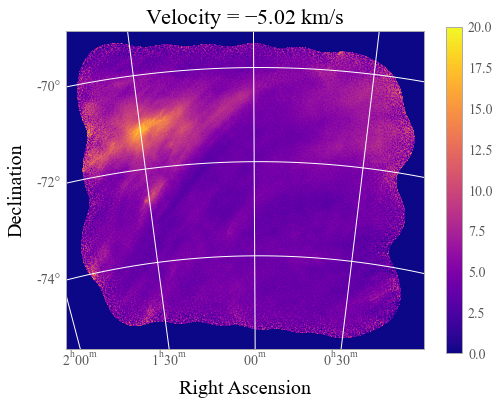

In [707]:
#VELOCITY = -5.02 * 10^3 M/S

get_plot(46, '$\mathregular{-5.02}$', 'im_-5.02.png')

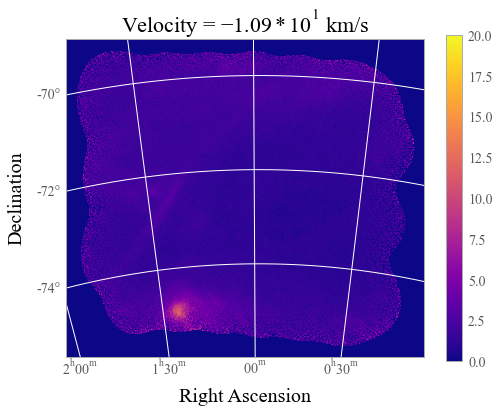

In [708]:
#VELOCITY = -1.09 * 10^4 M/S

get_plot(52, '$\mathregular{-1.09 * 10^1}$', 'im_-1.09.png')

In [709]:
data[data == -32786] = np.nan
sum_data = np.nansum(np.nansum(data, axis = 1), axis = 1)
sum_data.shape

(84,)

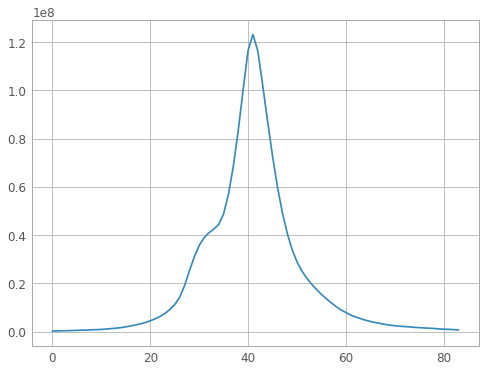

In [444]:
plt.plot(sum_data) # plot of brightness intensity vs velocity